<a href="https://colab.research.google.com/github/aldadobi/Spatial-transcriptomics-with-breast-tissue/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a756fcec2805aaaa9e8520ac6831adea007c5cd56d59d9e2edf4a55dbb9cdf0f
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=10909009b51772f6abfd3fa2e869d478ebeb545b79275563b6e9ed828fac1980
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd9

In [ ]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the path of the new folder
new_folder_path = '/content/spatial'

# Create the new folder
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
    print(f"Folder created at {new_folder_path}")
else:
    print(f"Folder already exists at {new_folder_path}")

Folder created at /content/spatial


In [ ]:
!tar -xvf '/content/drive/MyDrive/lung_ST/GSE178361_RAW.tar' -C "/content"

GSM5388414_DD073R_A1_processed.tar.gz
GSM5388415_DD073R_D1_processed.tar.gz


In [ ]:
!tar -xzvf "/content/GSM5388414_DD073R_A1_processed.tar.gz" -C "/content/spatial"

DD073R_A1_processed/
DD073R_A1_processed/filtered_feature_bc_matrix.h5
DD073R_A1_processed/raw_feature_bc_matrix.h5
DD073R_A1_processed/spatial/
DD073R_A1_processed/spatial/aligned_fiducials.jpg
DD073R_A1_processed/spatial/detected_tissue_image.jpg
DD073R_A1_processed/spatial/scalefactors_json.json
DD073R_A1_processed/spatial/tissue_hires_image.png
DD073R_A1_processed/spatial/tissue_lowres_image.png
DD073R_A1_processed/spatial/tissue_positions_list.csv


In [ ]:
adata = sc.read_visium('/content/spatial/DD073R_A1_processed')
adata.var_names_make_unique()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


# Component of Anndata

n_obs: spots, n_vars: genes

=> 1175 spots, 36601 genes

- **obs** (Observations): 'Anndata'에서 metadata를 represent

- **var** (Variables): gene
- **uns** (Unstructured): data that doesn’t fit into the tabular format of obs or var (이 실험에서는 spatial coordinate에 해당)

   => 실험 조건, 데이터 버전과 같은 high-level data, graphs, miscellaneous data 등

- **obsm** (Observations Mapped to Array): to store multi-dimensional annotations of observations (spatial images)

   => can hold the results of dimensionality reduction techniques like PCA, t-SNE, or UMAP

In [ ]:
adata

AnnData object with n_obs × n_vars = 1175 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
# img saved as undtructured data under the path of dictionaries below
adata.uns['spatial']['DD73RA1_rep2']['images']['hires'].shape

(2000, 1815, 3)

In [ ]:
# row corresponds to the coordinate of the barcode
adata.obsm['spatial'].shape

(1175, 2)

In [ ]:
adata.obs

in_tissue  array_row  array_col
AAACAGAGCGACTCCT-1          1         14         94
AAACAGGGTCTATATT-1          1         47         13
AAACCGGGTAGGTACC-1          1         42         28
AAACCGTTCGTCCAGG-1          1         52         42
AAACTTGCAAACGTAT-1          1         45         19
...                       ...        ...        ...
TTGTTAGCAAATTCGA-1          1         22         42
TTGTTCAGTGTGCTAC-1          1         24         64
TTGTTTCACATCCAGG-1          1         58         42
TTGTTTCATTAGTCTA-1          1         60         30
TTGTTTCCATACAACT-1          1         45         27

[1175 rows x 3 columns]

In [ ]:
# 모든 spot의 카테고리를 a로 하여 mapping 되어 있는 spot 보기
adata.obs['thing'] = 'a'

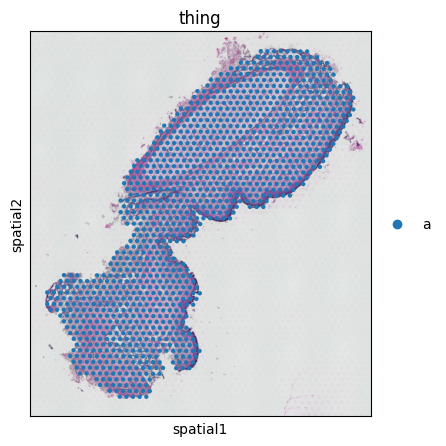

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
sc.pl.spatial(adata, color ='thing')

# Preprocessing data

https://scanpy.readthedocs.io/en/stable/api.html#module-scanpy.pp

In [ ]:
adata.var["mt"] = adata.var_names.str.startswith("MT") #count mitochondrial reeds
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

In [ ]:
# percent count mitochondrial이 잘 넘어가서 모두 다 0이 아닌지 확인해보기 위해
adata.obs

in_tissue  array_row  array_col thing  n_genes_by_counts  \
AAACAGAGCGACTCCT-1          1         14         94     a               2265   
AAACAGGGTCTATATT-1          1         47         13     a               6792   
AAACCGGGTAGGTACC-1          1         42         28     a               2418   
AAACCGTTCGTCCAGG-1          1         52         42     a               2743   
AAACTTGCAAACGTAT-1          1         45         19     a               2189   
...                       ...        ...        ...   ...                ...   
TTGTTAGCAAATTCGA-1          1         22         42     a               1072   
TTGTTCAGTGTGCTAC-1          1         24         64     a               2034   
TTGTTTCACATCCAGG-1          1         58         42     a               4957   
TTGTTTCATTAGTCTA-1          1         60         30     a               2076   
TTGTTTCCATACAACT-1          1         45         27     a               1684   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAGAGCGACTCCT-1                 7.725771        4567.0            8.426830   
AAACAGGGTCTATATT-1                 8.823648       47816.0           10.775137   
AAACCGGGTAGGTACC-1                 7.791110        5088.0            8.534837   
AAACCGTTCGTCCAGG-1                 7.917172        6143.0            8.723231   
AAACTTGCAAACGTAT-1                 7.691657        6093.0            8.715060   
...                                     ...           ...                 ...   
TTGTTAGCAAATTCGA-1                 6.978214        1821.0            7.507690   
TTGTTCAGTGTGCTAC-1                 7.618251        4157.0            8.332789   
TTGTTTCACATCCAGG-1                 8.508758       20920.0            9.948508   
TTGTTTCATTAGTCTA-1                 7.638680        4469.0            8.405144   
TTGTTTCCATACAACT-1                 7.429521        3432.0            8.141190   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAGAGCGACTCCT-1                   24.523757                    33.873440   
AAACAGGGTCTATATT-1                   52.085076                    58.927974   
AAACCGGGTAGGTACC-1                   23.919025                    31.741352   
AAACCGTTCGTCCAGG-1                   25.297086                    32.801563   
AAACTTGCAAACGTAT-1                   38.634499                    48.022321   
...                                        ...                          ...   
TTGTTAGCAAATTCGA-1                   26.633718                    36.079077   
TTGTTCAGTGTGCTAC-1                   24.585037                    33.894636   
TTGTTTCACATCCAGG-1                   48.723709                    53.957935   
TTGTTTCATTAGTCTA-1                   27.769076                    36.249720   
TTGTTTCCATACAACT-1                   28.321678                    37.791375   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAGAGCGACTCCT-1                    44.230348                    59.054084   
AAACAGGGTCTATATT-1                    65.942362                    73.142881   
AAACCGGGTAGGTACC-1                    41.332547                    56.721698   
AAACCGTTCGTCCAGG-1                    42.064138                    56.649845   
AAACTTGCAAACGTAT-1                    57.557853                    69.998359   
...                                         ...                          ...   
TTGTTAGCAAATTCGA-1                    48.709500                    68.588688   
TTGTTCAGTGTGCTAC-1                    44.479192                    61.029589   
TTGTTTCACATCCAGG-1                    59.756214                    67.958891   
TTGTTTCATTAGTCTA-1                    45.938689                    61.691654   
TTGTTTCCATACAACT-1                    48.047786                    65.501166   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  
AAACAGAGCGACTCCT-1            393.0               5.976351       8.605211  
AAACAGGGTCTATATT-1      

<ipython-input-16-3b878cde9d8d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
<ipython-input-16-3b878cde9d8d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"]<10000], kde=False, bins = 40, ax=

<function matplotlib.pyplot.show(close=None, block=None)>

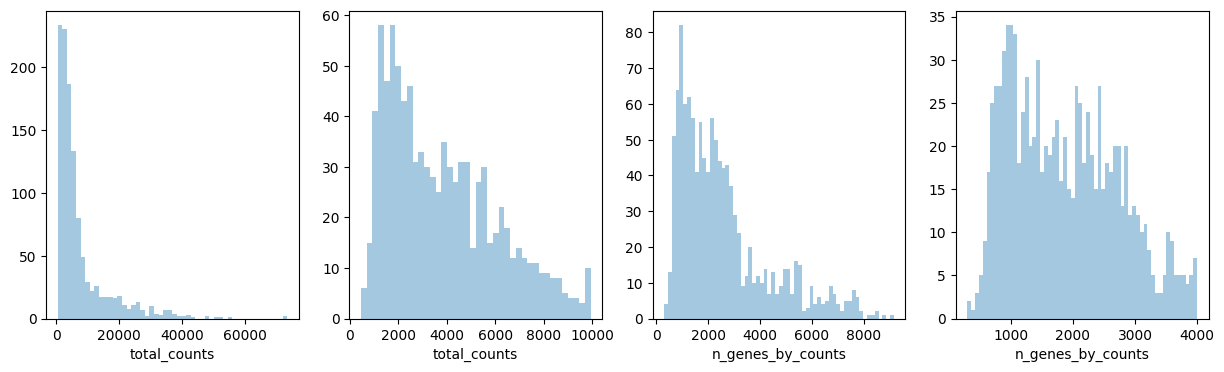

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15,4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"]<10000], kde=False, bins = 40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"]<4000], kde=False, bins = 60, ax=axs[3])

plt.show

<ipython-input-17-4ce370a24518>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"]<2000], kde=False, bins = 40)


<Axes: xlabel='total_counts'>

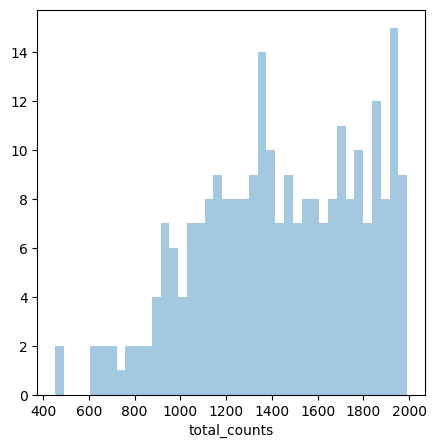

In [ ]:
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"]<2000], kde=False, bins = 40)

In [ ]:
sc.pp.filter_cells(adata, min_counts = 1000)
sc.pp.filter_cells(adata, max_counts = 35000)

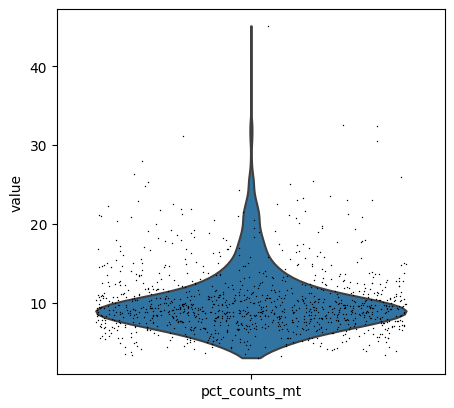

In [ ]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

In [ ]:
adata = adata[adata.obs["pct_counts_mt"]<20]
sc.pp.filter_genes(adata, min_cells=3)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [ ]:
adata

AnnData object with n_obs × n_vars = 1074 × 18585
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

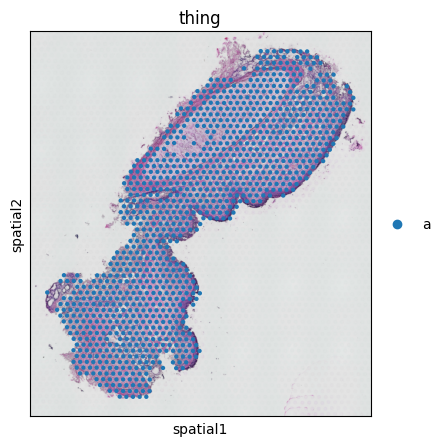

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color = 'thing')

In [ ]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [ ]:
pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.4 MB/s eta 0:00:00


In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


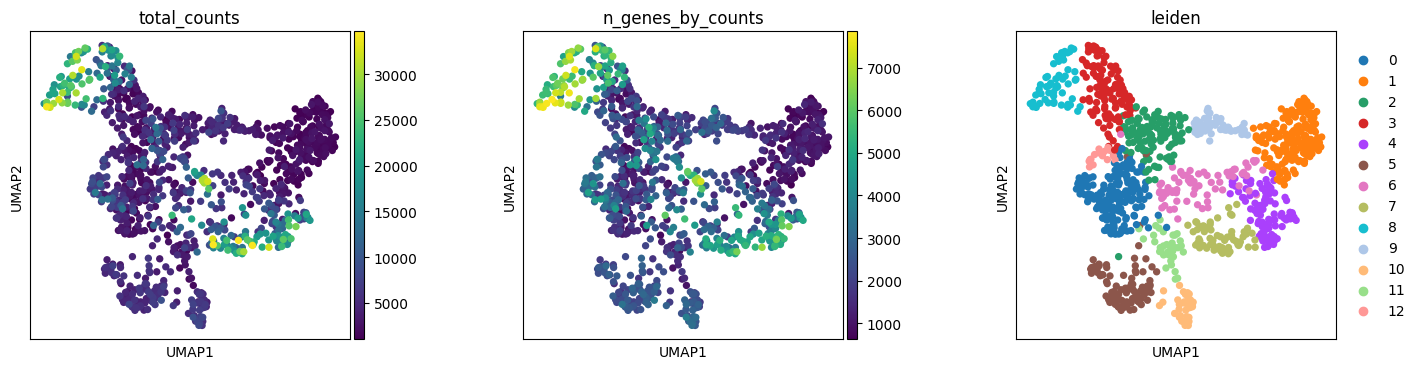

In [ ]:
#you can tell something is wrong in this QC becuase counts are biased by location/cluster
#may want to reduce threshold to remove

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

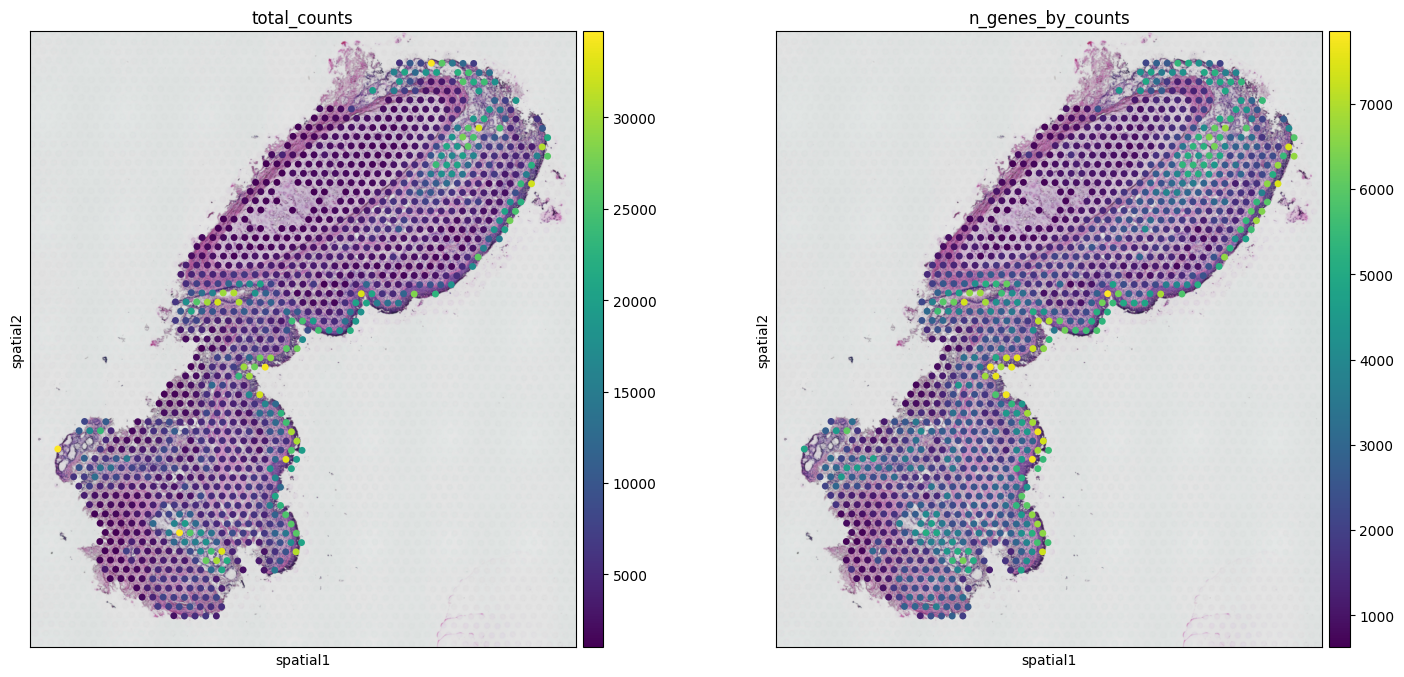

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

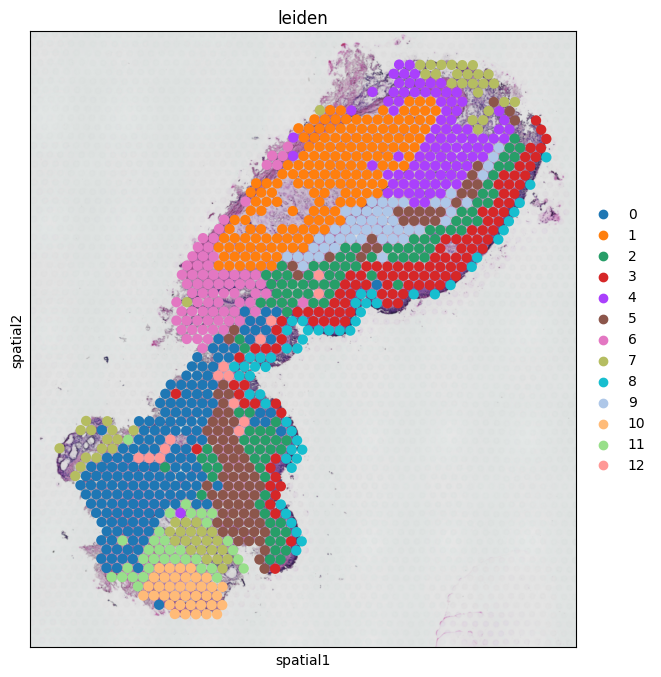

In [ ]:
sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.5)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

In [ ]:
#convert to dataframe
results = adata.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

out = np.array([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))



markers = pd.DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markers = markers[(markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]

In [ ]:
markers

Gene     scores  pval_adj       lfc cluster
0         IGHG3  13.696304       0.0  2.407137       0
1         IGHG4  13.549769       0.0  2.622926       0
2           CFD  11.640783       0.0  1.691818       0
3         PLVAP  10.835245       0.0  1.995015       0
4         HLA-E  10.745979       0.0  1.078038       0
...         ...        ...       ...       ...     ...
223026    PMP22   4.768177  0.004936  2.611529      12
223027      MPZ    4.69818  0.006098   5.60769      12
223028    CALM2   4.564473  0.009437  1.545243      12
223029    USP53   4.561539  0.009437  2.497152      12
223030  ANGPTL7   4.214489  0.042297  3.359688      12

[8673 rows x 5 columns]

In [ ]:
markers[markers.cluster == '2']

Gene     scores pval_adj       lfc cluster
37170    COL1A2   11.93641      0.0  1.810977       2
37171    COL1A1  11.307405      0.0  1.968235       2
37172    COL3A1  10.813175      0.0  1.835815       2
37174       VIM   8.813581      0.0   1.07543       2
37175    COL6A2   8.555686      0.0  1.141367       2
...         ...        ...      ...       ...     ...
55750  SERPINA3  -7.615132      0.0 -1.489567       2
55751      PIGR   -7.88133      0.0 -1.340431       2
55752       LTF  -8.026006      0.0 -1.871323       2
55753      SLPI  -8.093074      0.0 -1.183267       2
55754     MUC5B  -8.159823      0.0 -1.686448       2

[114 rows x 5 columns]

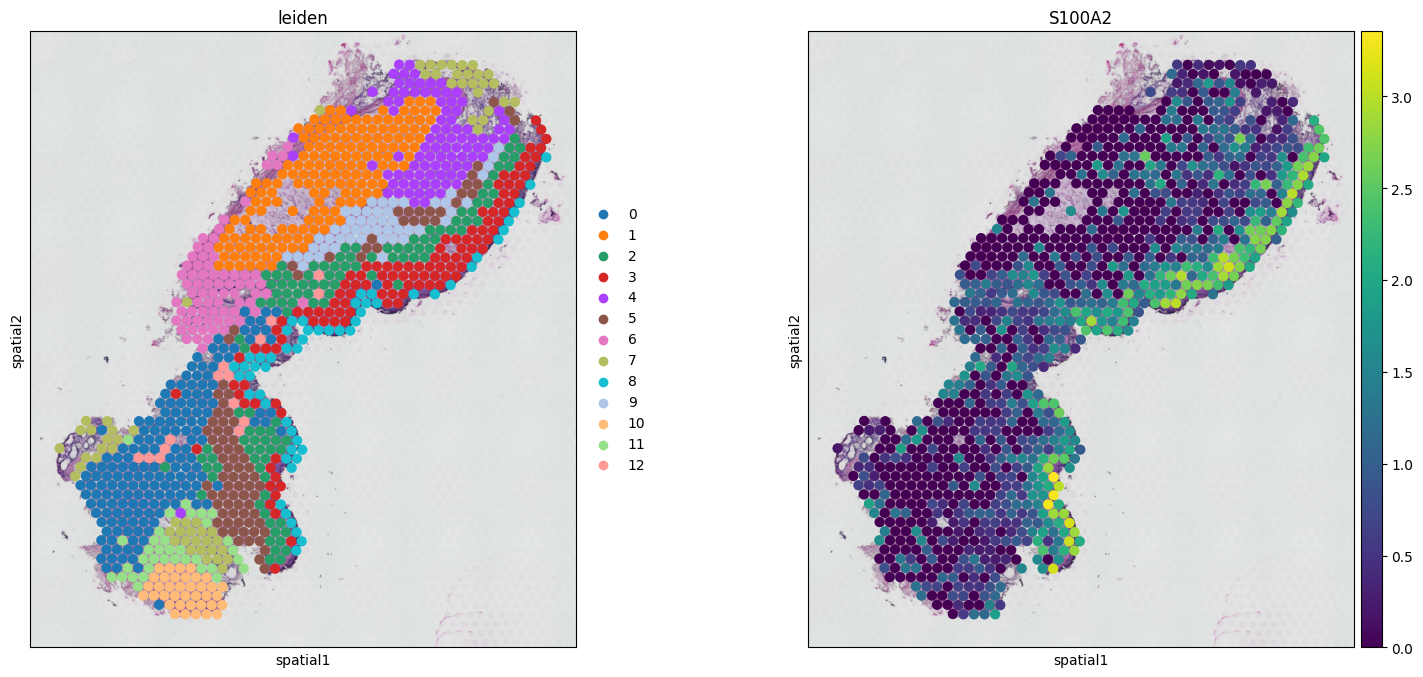

In [ ]:
sc.pl.spatial(adata, img_key="hires", color=["leiden", "S100A2"], size=1.5,)

In [ ]:
pip install openpyxl

In [ ]:
# excel file for sorting gene markers
markers.to_excel('markers.xlsx', index=False)

In [ ]:
adata.uns

OrderedDict([('spatial',
              {'DD73RA1_rep2': {'images': {'hires': array([[[0.05098039, 0.05882353, 0.05882353],
                         [0.10196079, 0.10980392, 0.10588235],
                         [0.09803922, 0.10588235, 0.10196079],
                         ...,
                         [0.6313726 , 0.64705884, 0.63529414],
                         [0.627451  , 0.6431373 , 0.6313726 ],
                         [0.1882353 , 0.19215687, 0.1882353 ]],
                 
                        [[0.3372549 , 0.3529412 , 0.34901962],
                         [0.7019608 , 0.7176471 , 0.7137255 ],
                         [0.7019608 , 0.7176471 , 0.7137255 ],
                         ...,
                         [0.8392157 , 0.85490197, 0.84313726],
                         [0.8392157 , 0.85490197, 0.84313726],
                         [0.2509804 , 0.25490198, 0.2509804 ]],
                 
                        [[0.4117647 , 0.42745098, 0.42352942],
                       

In [ ]:
cluster_labels = adata.obs['leiden'].to_frame() # Get the cluster labels as a DataFrame
spatial_coords = pd.DataFrame(adata.obsm['spatial'], index=adata.obs.index, columns=['x_coord', 'y_coord'])

combined_data = pd.concat([cluster_labels, spatial_coords], axis=1)
combined_array = combined_data.to_numpy()

print(combined_array)

[['2' 2162 856]
 ['0' 873 1796]
 ['5' 1144 2136]
 ...
 ['7' 1143 2339]
 ['10' 909 2406]
 ['0' 853 1898]]


In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039278 sha256=9380ac82ab948850f158ecc35055d176b44c9de58d6f54e0b25e024d55ee1337
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


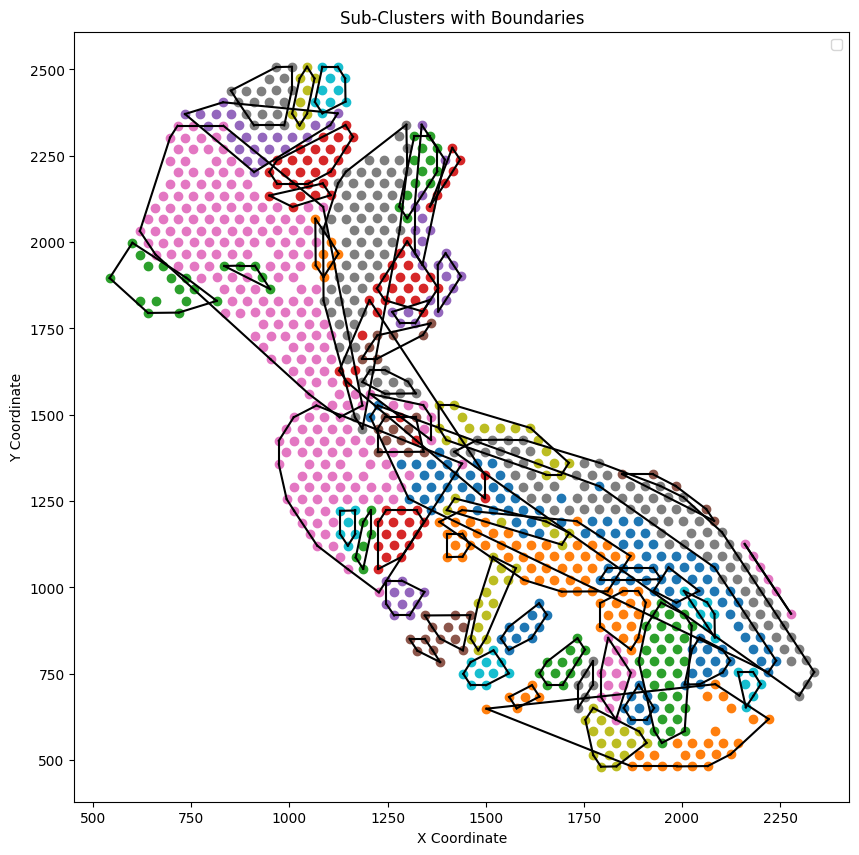

In [ ]:
import pandas as pd
import hdbscan
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

cluster_labels = adata.obs['leiden'].to_frame()  # Get the cluster labels as a DataFrame
spatial_coords = pd.DataFrame(adata.obsm['spatial'], index=adata.obs.index, columns=['x_coord', 'y_coord'])

# Combine data
combined_data = pd.concat([cluster_labels, spatial_coords], axis=1)

# Function to perform sub-clustering and draw boundaries
def sub_cluster_and_draw(data):
    plt.figure(figsize=(10, 10))
    plotted = False  # Flag to check if any plot has been made

    for cluster_id in data['leiden'].unique():
        cluster_data = data[data['leiden'] == cluster_id].copy()

        # Perform HDBSCAN for sub-clustering
        clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
        sub_clusters = clusterer.fit_predict(cluster_data[['x_coord', 'y_coord']])
        cluster_data['sub_cluster'] = sub_clusters

        for sub_cluster_id in np.unique(sub_clusters):
            if sub_cluster_id == -1:
                continue

            sub_cluster_data = cluster_data[cluster_data['sub_cluster'] == sub_cluster_id]

            if len(sub_cluster_data) > 2:
                hull = ConvexHull(sub_cluster_data[['x_coord', 'y_coord']])
                for simplex in hull.simplices:
                    plt.plot(sub_cluster_data.iloc[simplex, 1], sub_cluster_data.iloc[simplex, 2], 'k-')
                plotted = True

            #plt.scatter(sub_cluster_data['x_coord'], sub_cluster_data['y_coord'], label=f'Cluster {cluster_id}, Sub-cluster {sub_cluster_id}')
            plt.scatter(sub_cluster_data['x_coord'], sub_cluster_data['y_coord'])
            plotted = True

    plt.title('Sub-Clusters with Boundaries')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    if plotted:
        plt.legend()
    plt.show()

# Call the function
sub_cluster_and_draw(combined_data)


In [ ]:
import pandas as pd
import scanpy as sc

# Load the Excel file
markers_df = pd.read_excel('sorted_markers.xlsx')

# Map genes to cell names
gene_to_cell = dict(zip(markers_df['Gene'], markers_df['Cell']))

# List of genes related to 'alveolar type 1 cells' and 'alveolar type 2 cells'
alveolar_related_genes = [...]  # Replace with the actual list of genes

# Find the most expressed gene per spot and its corresponding cell type
adata_exp_df = adata.to_df()
adata.obs['most_expressed_gene'] = adata_exp_df.idxmax(axis=1)
adata.obs['cell_name'] = adata.obs['most_expressed_gene'].apply(lambda gene: gene_to_cell.get(gene, 'undetermined'))

# Update the most expressed gene for each spot
for spot in adata.obs.index:
    # Get the top 50 expressed genes for this spot
    top_50_genes = adata_exp_df.loc[spot].sort_values(ascending=False).head(50).index
    alveolar_genes_in_top_50 = [gene for gene in top_50_genes if gene in alveolar_related_genes]

    if alveolar_genes_in_top_50:
        # Update to the first alveolar-related gene in the top 50
        adata.obs.at[spot, 'most_expressed_gene'] = alveolar_genes_in_top_50[0]
        adata.obs.at[spot, 'cell_name'] = gene_to_cell.get(alveolar_genes_in_top_50[0], 'undetermined')
    else:
        # Existing logic for non-alveolar genes
        for gene in top_50_genes:
            if gene_to_cell.get(gene, 'undetermined') not in ['undetermined', 'fibroblast']:
                adata.obs.at[spot, 'most_expressed_gene'] = gene
                adata.obs.at[spot, 'cell_name'] = gene_to_cell.get(gene, 'undetermined')
                break

In [ ]:
adata.obs.to_excel('adata.obs.xlsx', index=False)

<ipython-input-42-e4d594d6243e>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  export_df = export_df.append({
<ipython-input-42-e4d594d6243e>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  export_df = export_df.append({
<ipython-input-42-e4d594d6243e>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  export_df = export_df.append({
<ipython-input-42-e4d594d6243e>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  export_df = export_df.append({
<ipython-input-42-e4d594d6243e>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  export_df = export_df

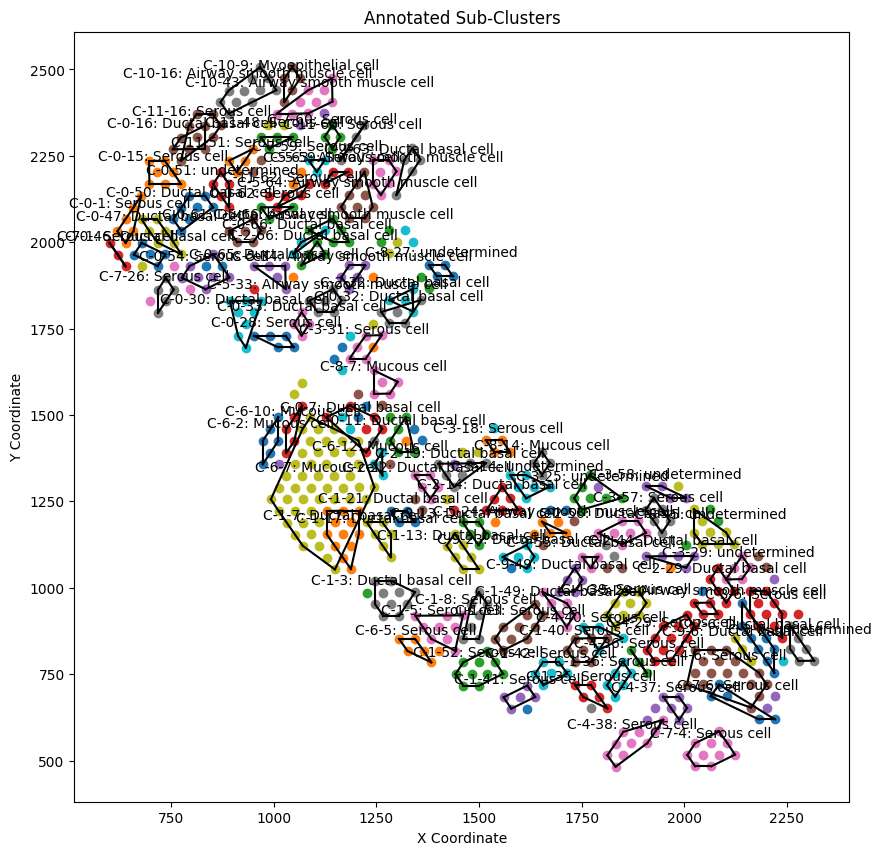

In [ ]:
# Find the most expressed gene per spot
adata.obs['most_expressed_gene'] = adata.to_df().idxmax(axis=1)

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
sub_clusters = clusterer.fit_predict(adata.obsm['spatial'])
adata.obs['sub_cluster'] = sub_clusters

export_df = pd.DataFrame(columns=['Cluster_ID', 'Sub_Cluster_ID', 'Most_Common_Cell', 'Centroid_X', 'Centroid_Y'])

def annotate_sub_clusters(adata, export_df):
    plt.figure(figsize=(10, 10))

    for cluster_id in adata.obs['leiden'].unique():
        cluster_data = adata[adata.obs['leiden'] == cluster_id]

        for sub_cluster_id in cluster_data.obs['sub_cluster'].unique():
            if sub_cluster_id == -1:
                continue

            sub_cluster_data = cluster_data[cluster_data.obs['sub_cluster'] == sub_cluster_id]
            spatial_coords = sub_cluster_data.obsm['spatial']

            if len(spatial_coords) > 2:
                hull = ConvexHull(spatial_coords)
                for simplex in hull.simplices:
                    plt.plot(spatial_coords[simplex, 0], spatial_coords[simplex, 1], 'k-')

                # Find the most common cell name
                if 'alveolar type 1 cells' in sub_cluster_data.obs['cell_name'].values:
                    most_common_cell = 'alveolar type 1 cells'
                elif 'alveolar type 2 cells' in sub_cluster_data.obs['cell_name'].values:
                    most_common_cell = 'alveolar type 2 cells'
                else:
                    # Find the most common cell name
                    mode_result = sub_cluster_data.obs['cell_name'].mode()
                    most_common_cell = mode_result[0] if not mode_result.empty else 'Unknown'

                # Annotate the sub-cluster
                centroid = spatial_coords.mean(axis=0)
                annotation = f'C-{cluster_id}-{sub_cluster_id}: {most_common_cell}'
                plt.annotate(annotation, centroid, textcoords="offset points", xytext=(0,10), ha='center')

                # Add data to export DataFrame
                export_df = export_df.append({
                    'Cluster_ID': cluster_id,
                    'Sub_Cluster_ID': sub_cluster_id,
                    'Most_Common_Cell': most_common_cell,
                    'Centroid_X': centroid[0],
                    'Centroid_Y': centroid[1]
                }, ignore_index=True)

            plt.scatter(spatial_coords[:, 0], spatial_coords[:, 1])

    plt.title('Annotated Sub-Clusters')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

    return export_df

# Call the function and get the export DataFrame
export_df = annotate_sub_clusters(adata, export_df)

# Export to Excel
export_df.to_excel('annotated_clusters.xlsx', index=False)


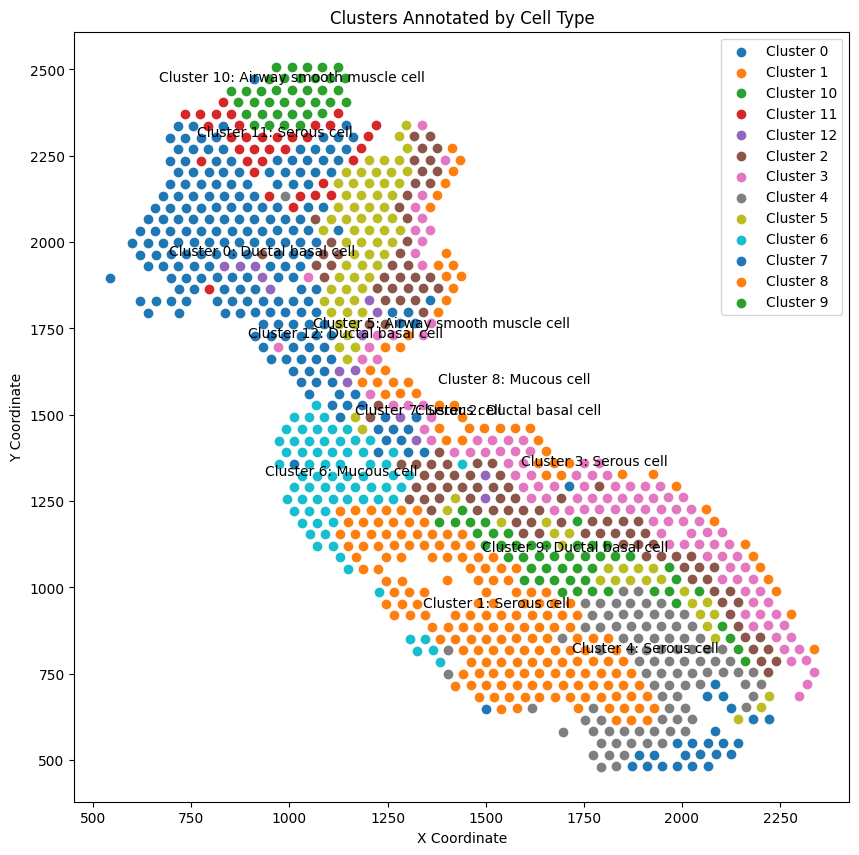


List of Clusters with Cell Names:
Cluster 0: Ductal basal cell
Cluster 1: Serous cell
Cluster 10: Airway smooth muscle cell
Cluster 11: Serous cell
Cluster 12: Ductal basal cell
Cluster 2: Ductal basal cell
Cluster 3: Serous cell
Cluster 4: Serous cell
Cluster 5: Airway smooth muscle cell
Cluster 6: Mucous cell
Cluster 7: Serous cell
Cluster 8: Mucous cell
Cluster 9: Ductal basal cell


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def annotate_clusters(adata):
    plt.figure(figsize=(10, 10))

    # Dictionary to store the chosen cell type for each formal cluster
    cluster_chosen_cells = {}

    for cluster_id in sorted(adata.obs['leiden'].unique()):
        cluster_data = adata[adata.obs['leiden'] == cluster_id]

        # Collect all cell names in this formal cluster
        all_cell_names = cluster_data.obs['cell_name'].tolist()

        # Determine the most common cell type in the formal cluster
        cell_counts = pd.Series(all_cell_names).value_counts()
        most_common_cell = cell_counts.idxmax()

        # Check if the most common cell is 'undetermined'
        if most_common_cell == 'undetermined':
            # Find the second most common cell type
            if len(cell_counts) > 1:
                second_most_common_cell = cell_counts.index[1]
                chosen_cell = second_most_common_cell
            else:
                chosen_cell = 'undetermined'
        else:
            chosen_cell = most_common_cell

        cluster_chosen_cells[cluster_id] = chosen_cell

        # Plotting and annotating the cluster
        spatial_coords = cluster_data.obsm['spatial']
        plt.scatter(spatial_coords[:, 0], spatial_coords[:, 1], label=f'Cluster {cluster_id}')

        # Annotate the formal cluster
        centroid = spatial_coords.mean(axis=0)
        annotation = f'Cluster {cluster_id}: {chosen_cell}'
        plt.annotate(annotation, centroid, textcoords="offset points", xytext=(0,10), ha='center')

    plt.title('Clusters Annotated by Cell Type')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    # Print the list of clusters with their chosen cell type
    print("\nList of Clusters with Cell Names:")
    for cluster_id, cell_name in sorted(cluster_chosen_cells.items()):
        print(f"Cluster {cluster_id}: {cell_name}")

    return cluster_chosen_cells

# Call the function
cluster_chosen_cells = annotate_clusters(adata)
